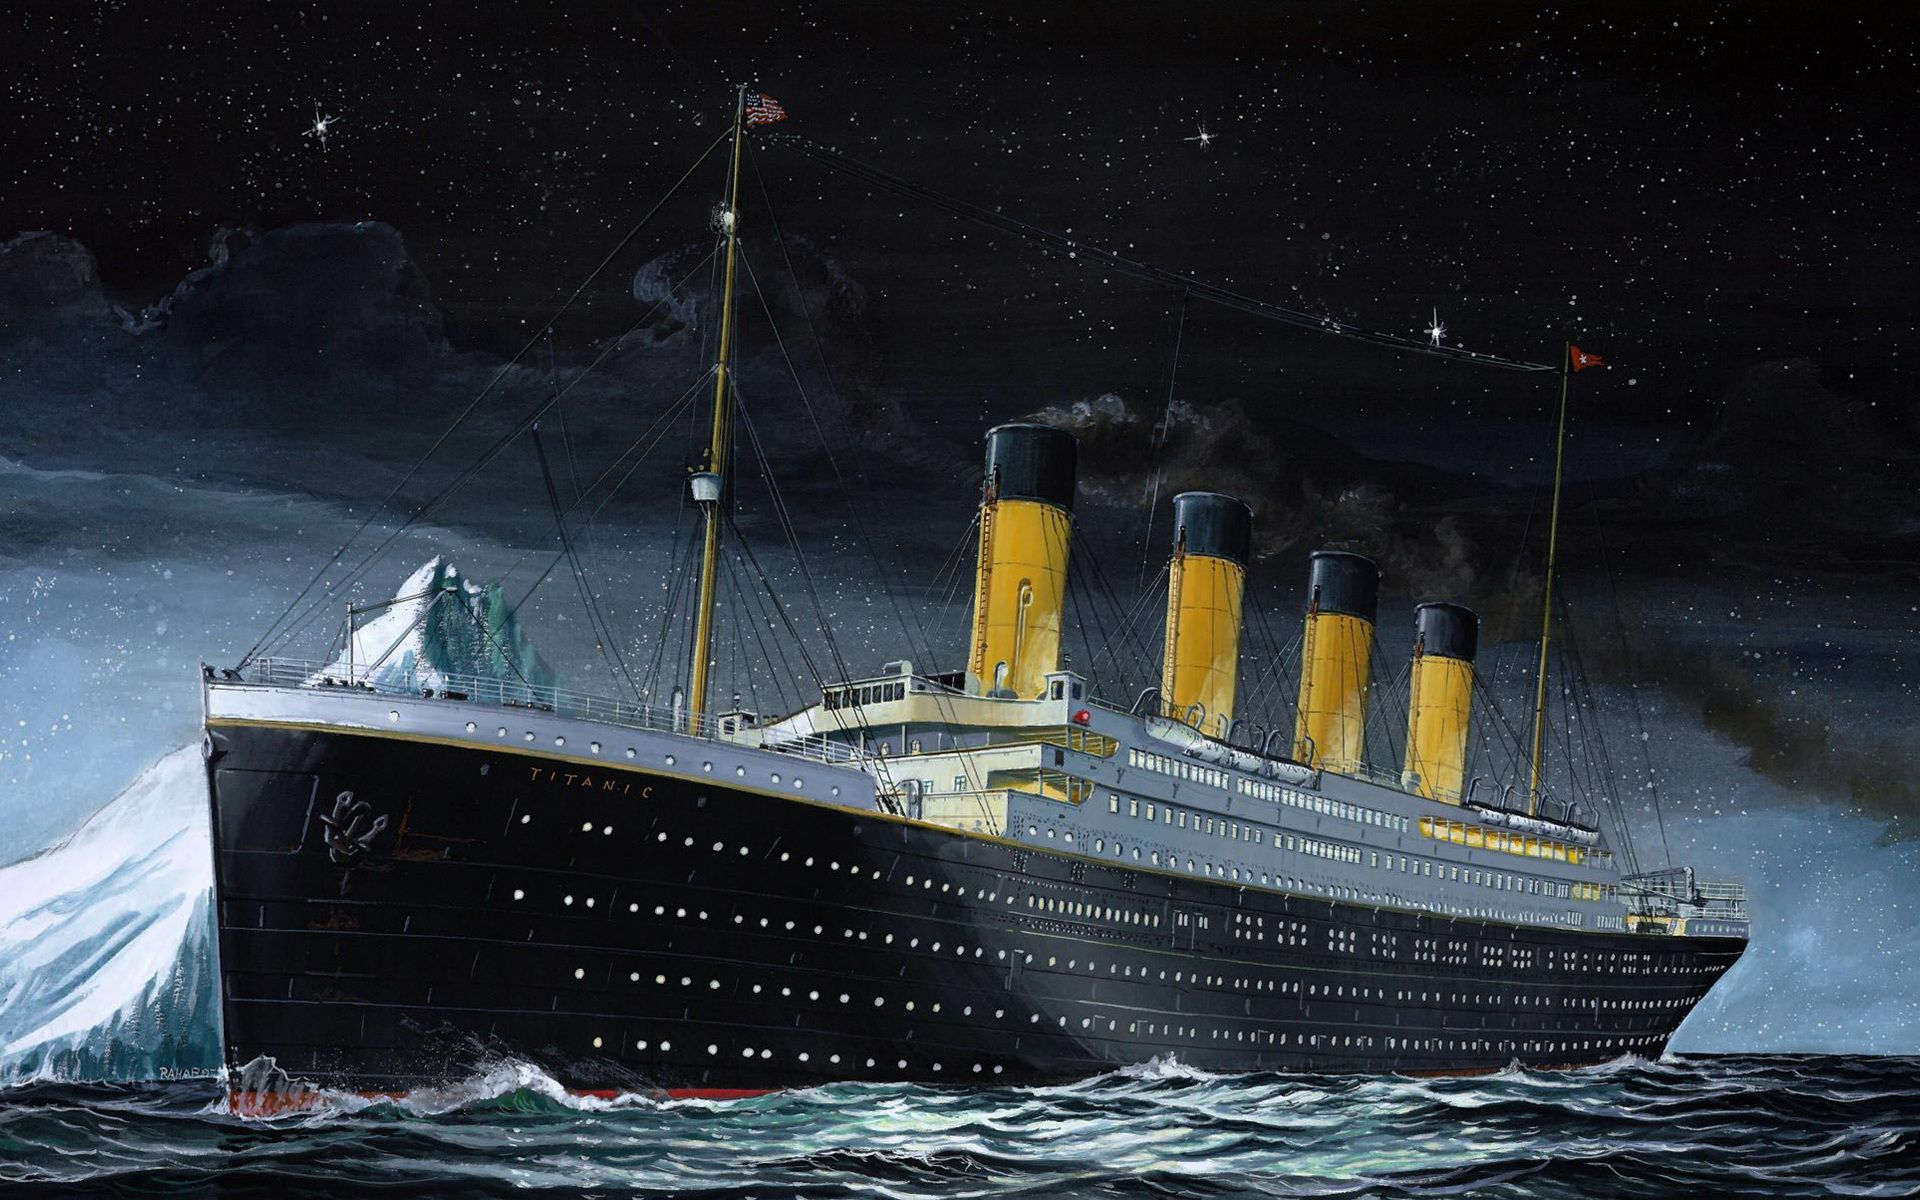

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from tpot import TPOTClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [142]:
# Load dataset
file_path = 'titanic.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Exploratory Data Analysis
print(data.info())
print(data.describe())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


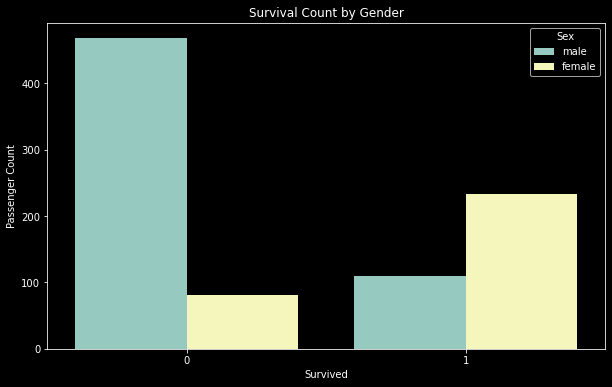

In [143]:
# Visualizations
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show()



In [144]:
#! pip install tpot

In [145]:
#!pip install lazypredict
#!pip install xgboost

In [146]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
data.duplicated().sum()

0

In [148]:
sex_counts=data['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

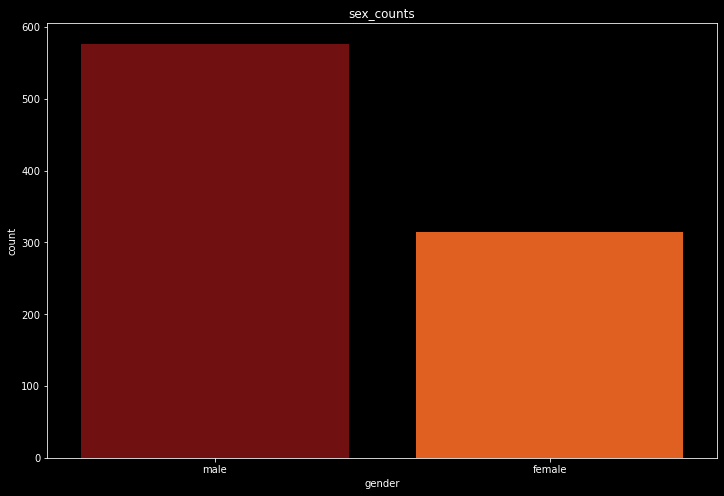

In [149]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='gist_heat')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

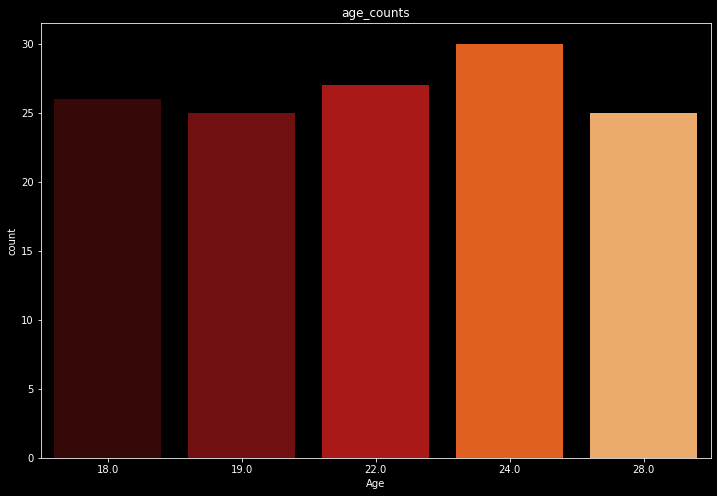

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
Name: Age, dtype: int64

In [150]:
#the most 5 age in data
age_counts=data['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='gist_heat')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [151]:
#pclass_counts=data['Pclass'].value_counts()
#plt.figure(figsize = (20, 6))
#explode = (0,0,0.05)
#pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
#plt.title('Passenger Class')
#plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
#plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
#plt.legend(labels = pclass_counts.index, loc = "best")
#plt.show()

In [152]:
sSp_counts=data['SibSp'].value_counts()
sSp_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

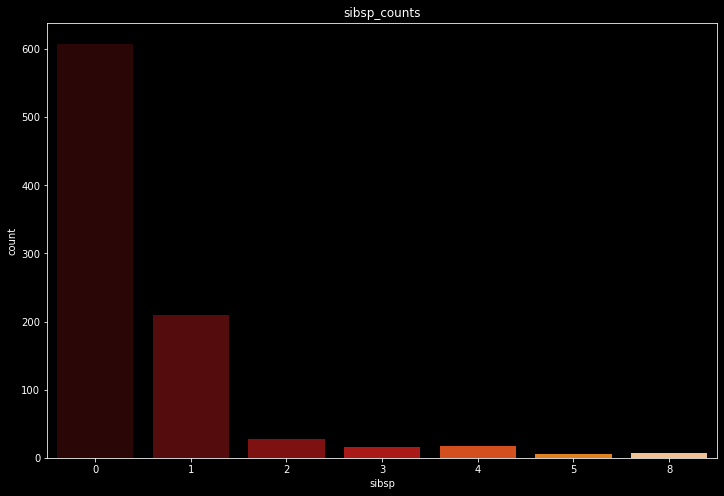

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(x=sSp_counts.index,y=sSp_counts.values,palette='gist_heat')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

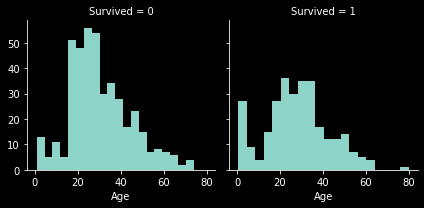

In [154]:
age=sns.FacetGrid(data,col='Survived',palette = 'colorblind')
age.map(plt.hist,'Age',bins=20)

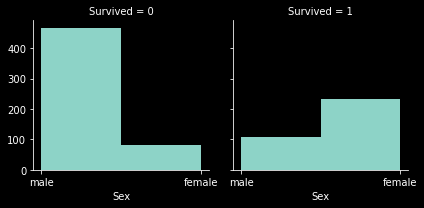

In [155]:
gender=sns.FacetGrid(data,col='Survived')  #survival according to gender

gender.map(plt.hist,'Sex',bins=2)

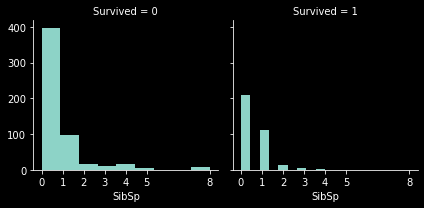

In [156]:
sibsp=sns.FacetGrid(data,col='Survived') #whether sibblings or spouses are survived or not?

plt.xticks(sSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

# Data Cleaning

Using statistical metrics like mean, median, or regression models based on other relevant data, I have missing values in column age.
There are a lot of missing data in the 'Cabin' column. If this column is not essential to our study, we may decide to remove it completely.
If there is a link with other variables for the 'Embarked' column, we can utilise sophisticated approaches like regression models or impute missing values with the most common value.

<AxesSubplot:>

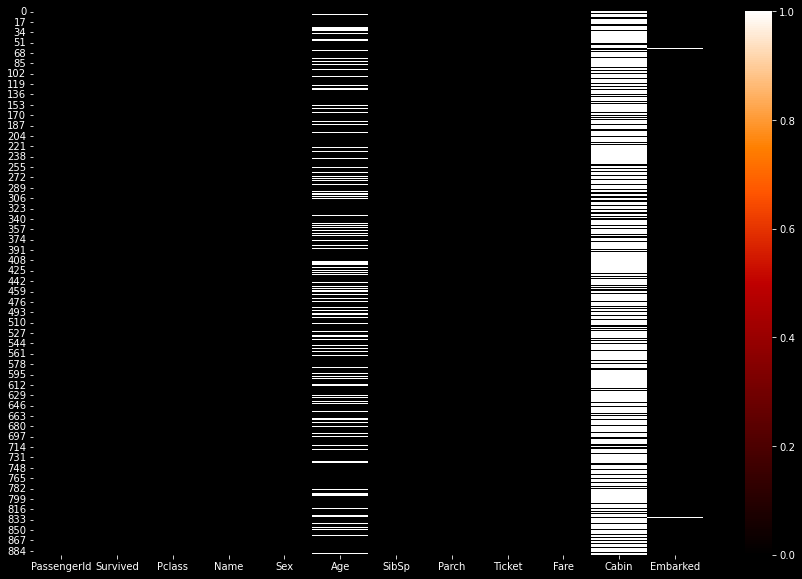

In [157]:
# let's revisit the null values once again:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.isnull(),cmap='gist_heat',ax=ax)

In [158]:
# convert the gender to binary 0 and 1 otherwise the ML algorithms won't work
data['Sex']=data['Sex'].replace({'male':1,'female':0})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

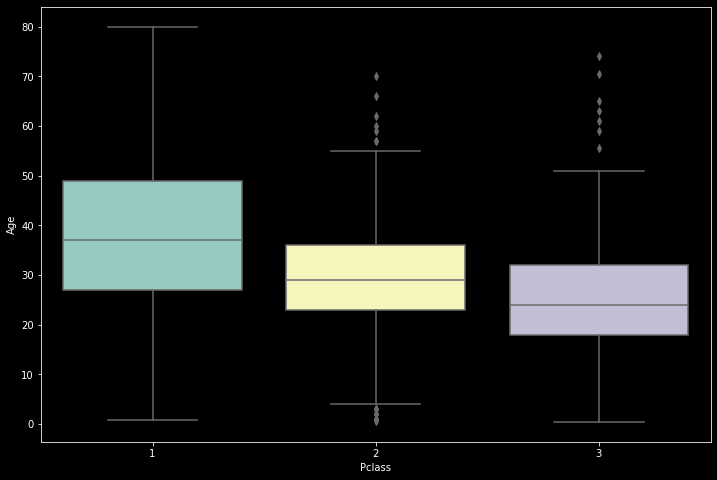

In [159]:
# let's check for the outliers now:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=data)



In [160]:
# here its visible that older people are travelling more in class i and 2

## Drop the less important columns,
 in this example Cabin. The Cabin column does not provide much information because insights may be gained from other columns such as PClass, Embarked, and so forth. As a result, I dropped the Cabin Column. Also, check for any null values, if present we drop all the null values using dropna() function in Python.

In [161]:
data.drop('Cabin',axis=1,inplace=True)


In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,S
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,S


<AxesSubplot:>

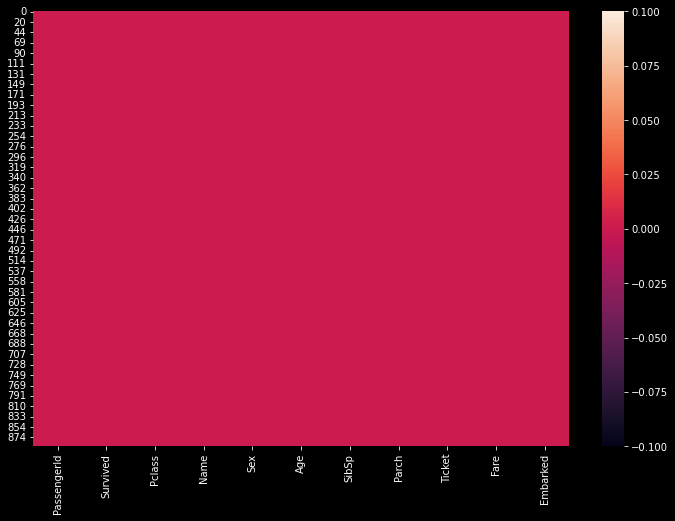

In [163]:
#checking again for null values
plt.figure(figsize=(12,8))
data.dropna(inplace=True)
sns.heatmap(data.isnull())

In [164]:
# now data seems fine
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [165]:
# now we have to change the column 'Embarked' and others to boolean values



## Model Construction Methodology
Prepare the model before feeding it into the Machine Learning(ML) Algorithm. The ML Algorithms do not comprehend categorical or any other data that is not numerical, thus I will use tools to transform the columns with categorical data (Embarked) to numeric.


In [166]:
data['Embarked']=data['Embarked'].replace({'S':1,'C':2,'Q':3})
data.head()
'''
we can drop any one coloum as other two will say the rest'''

'\nwe can drop any one coloum as other two will say the rest'

In [167]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.28,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,1
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,1


In [168]:
data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1


In [169]:
data.corr() # computing the column wise correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.36,-0.54,-0.08,-0.02,0.10,0.27,0.11
Pclass,-0.36,1.00,0.15,-0.37,0.07,0.02,-0.55,-0.11
Sex,-0.54,0.15,1.00,0.10,-0.11,-0.25,-0.18,-0.10
Age,-0.08,-0.37,0.10,1.00,-0.31,-0.19,0.09,0.01
SibSp,-0.02,0.07,-0.11,-0.31,1.00,0.38,0.14,0.00
Parch,0.10,0.02,-0.25,-0.19,0.38,1.00,0.21,-0.01
Fare,0.27,-0.55,-0.18,0.09,0.14,0.21,1.00,0.18
Embarked,0.11,-0.11,-0.10,0.01,0.00,-0.01,0.18,1.00


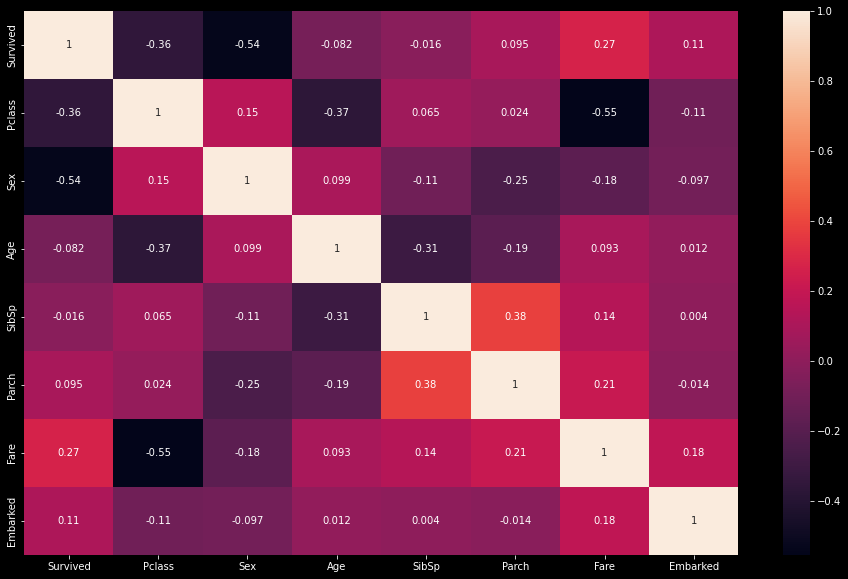

In [170]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Data Cleaning and Processing is Done, Now its time for ML Training
# -----------------------------------------------------------------------------

# 'ML Training using different Algorithms'

In [171]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1


In [172]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [173]:
# Defining targets and rescaling the data

x=data.drop(columns=['Survived'])
y=data['Survived']


In [174]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)


In [175]:
y=y.values.reshape(-1,1)

# splitting the data for training:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,shuffle=True,random_state=42)


# Machine Learning Models:
### *******************************************

## 1. Logistic Regression
Logistic Regression is a statistical method used for binary classification, which means predicting a categorical outcome with two possible classes. Despite its name, it's actually a linear model that's used for classification rather than regression.

### Compact Description of Logistic Regression:

1. **Objective:**
   - Logistic Regression is utilized to model the probability of a binary outcome based on one or multiple predictor variables.

2. **Algorithm:**
   - It uses the logistic function (also known as the sigmoid function) to transform a linear combination of input features into a value between 0 and 1.
   - The logistic function maps any input value to an output value between 0 and 1, representing the probability of the given input belonging to the positive class.

3. **Assumptions:**
   - The relationship between the input features and the log-odds of the output follows a linear pattern.
   - The target variable should be binary or dichotomous.

4. **Working Principle:**
   - Logistic Regression calculates the log-odds of the probability of a particular event occurring.
   - The log-odds are transformed using the logistic function to produce predicted probabilities.

5. **Model Interpretation:**
   - The coefficients learned during training are used to interpret the impact of each feature on the probability of the outcome.
   - Positive coefficients indicate a positive relationship with the probability of the positive class, while negative coefficients suggest the opposite.

6. **Training:**
   - The model is trained using optimization algorithms (such as gradient descent) to find the best-fitting coefficients that minimize the error between predicted probabilities and actual outcomes.

7. **Performance Evaluation:**
   - Performance metrics like accuracy, precision, recall, F1-score, ROC-AUC curve, etc., are used to evaluate the model's predictive performance on a validation or test set.

8. **Use Cases:**
   - Commonly used in various fields including healthcare (disease prediction), finance (credit scoring), marketing (customer churn prediction), and more where binary classification is required.

9. **Advantages:**
   - Simple and efficient.
   - Provides probabilities for outcomes.
   - Easily interpretable results.

10. **Limitations:**
    - Assumes a linear relationship between features and log-odds.
    - May not perform well if the data has non-linear relationships.

In summary, Logistic Regression is a fundamental and widely-used classification algorithm due to its simplicity, interpretability, and effectiveness in binary classification tasks by estimating the probability of an instance belonging to a particular class.

In [176]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [177]:
lg.score(X_train,y_train)

0.8032786885245902

In [178]:
y_pred=lg.predict(X_test)

Accurecy of the model is:  0.7614035087719299 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matrix of the model is: 

 [[135  34]
 [ 34  82]]


<Figure size 864x576 with 0 Axes>

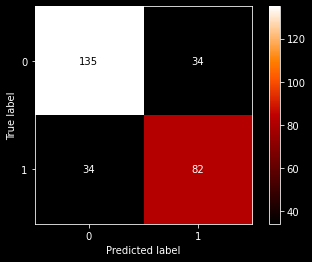

In [190]:
print('Accurecy of the model is: ',accuracy_score(y_test,y_pred),'\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(12,8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='gist_heat',)
print('Confusion Matrix of the model is: \n\n',confusion_matrix(y_test, y_pred))


In [191]:
print(classification_report(y_test, y_pred))
print('------------------------------------------------------------------')


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       169
           1       0.71      0.71      0.71       116

    accuracy                           0.76       285
   macro avg       0.75      0.75      0.75       285
weighted avg       0.76      0.76      0.76       285

------------------------------------------------------------------


### ------------------------------------------------------------------------------------------------------------------------------

In [95]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('titanic.csv')  # Replace 'titanic.csv' with your file name

# Data preprocessing
# For instance, handle missing values, encode categorical variables, and select features
# Identify problematic values
problematic_values = data[data['Name'].str.contains('[^a-zA-Z]', na=False)]['Name'].unique()
print(problematic_values.size)

# Clean 'embarked' column by removing non-alphabetic characters
data['Name'] = data['Name'].str.replace('[^a-zA-Z]', '', regex=True)

# Handle missing values by filling them with a default value (e.g., 'Unknown')
data['Name'].fillna('Unknown', inplace=True)
# Splitting data into training and testing sets
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))




891


ValueError: could not convert string to float: 'PartnerMrAusten'

In [ ]:
# Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Feature Importance Analysis
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Additional Visualizations (Customize as needed)
# ...

# Further analysis, hyperparameter tuning, and model improvement
# ...


In [86]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
data['age'] = imputer.fit_transform(data[['age']])
data['fare'] = imputer.fit_transform(data[['fare']])

# Handling missing values in 'embarked' column with the most frequent value
most_frequent_embarked = data['embarked'].mode()[0]
data['embarked'].fillna(most_frequent_embarked, inplace=True)

# Locate the row(s) with the problematic value in 'embarked' column
# Define the list of problematic substrings
problematic_values = data[data['name'].str.contains('[^a-zA-Z]', na=False)]['name'].unique()
print(problematic_values)


# Identify problematic values
problematic_values = data[data['name'].str.contains('[^a-zA-Z]', na=False)]['name'].unique()
print(problematic_values)

# Clean 'embarked' column by removing non-alphabetic characters
data['name'] = data['name'].str.replace('[^a-zA-Z]', '', regex=True)

# Handle missing values by filling them with a default value (e.g., 'Unknown')
data['name'].fillna('Unknown', inplace=True)



# Encode categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['embarked'] = label_encoder.fit_transform(data['embarked'].astype(str))

# Splitting the data into features (X) and target (y)
X = data.drop('survived', axis=1)
y = data['survived']


# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']


ValueError: could not convert string to float: 'MorleyMrHenrySamuelMrHenryMarshall'

In [ ]:
# Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Feature Importance Analysis
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Additional Visualizations (Customize as needed)
# ...

# Further analysis, hyperparameter tuning, and model improvement
# ...


1270
